## 1. Introduction

Social media has become one of the most influential tools for communication and
information sharing in modern societies, yet its intensity and usage patterns
vary significantly across countries. These variations are often shaped by
economic and developmental conditions. Motivated by the long-term goal of
building a social media platform, this study aims to better understand how
societies with different development levels engage with social media. By
examining the relationship between social media usage and country-level
development indicators, the findings provide insights into how development
contexts influence digital behaviors and user needs.


## 2. Data Collection

**monthly_time_spend_by_country.csv:** This dataset is obtained from Datareportal's Instagram, X, Tiktok, LinkedIn, Pinterest Users, Stats, Data & Trends for 2025. I couldn't find the actual dataset so I used the graphs that show monthly time spend data for top 50 countries. I used GenAI to convert these graphs to a merged data table.

Graphs: https://drive.google.com/drive/folders/11Oza-q2oY5u7eKO9wnQlAcZHpx14U2ee?usp=sharing

Final extracted dataset: https://drive.google.com/file/d/1XVIsLcXXbefWaH4NlXZDJHGTI9uUGbAo/view?usp=sharing

**android_phone_use_by_country.csv:** https://gs.statcounter.com/os-market-share/mobile/worldwide/#quarterly-202404-202404-map

Final dataset: https://drive.google.com/file/d/1Nfg3OeY6cbPBhYDJtB8w0S1-4T789Dl1/view?usp=sharing

**development_country.csv:** https://www.kaggle.com/datasets/tarktunataalt/2023-global-country-development-and-prosperity-index

Final dataset: https://drive.google.com/file/d/16qgpEV9k87cOgHd1SqIVORoXSGyxBYmF/view?usp=sharing


## 3. Data Cleaning and Preprocessing

In [5]:
import pandas as pd
import numpy as np

monthly = pd.read_csv("monthly_time_spend_by_country.csv")
android = pd.read_csv("android_phone_use_by_country.csv")
dev = pd.read_csv("development_country.csv")


In [ ]:
# Used the graphs in the link provided at repo

In [6]:
for df in [monthly, android, dev]:
    df["Country_Code"] = df["Country_Code"].astype(str).str.strip()

df = monthly.merge(android, on="Country_Code", how="left")
df = df.merge(dev, on="Country_Code", how="left")

df.replace("-", np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors="ignore")


/tmp/ipython-input-1347391290.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


In [9]:
# Sosyal medya sütunları (monthly içindeki, Country ve Country_Code hariç)
social_cols = [c for c in monthly.columns if c not in ["Country", "Country_Code"]]

# Android penetrasyon oranı (Country_Code ve Country dışındaki tek sayı sütunu)
android_rate_col = [c for c in android.columns if c not in ["Country", "Country_Code"]][0]

# Gelişmişlik göstergeleri
development_cols = dev.columns.drop(["Country", "Country_Code"], errors="ignore")

print("Social media columns:", social_cols)
print("Android rate column:", android_rate_col)
print("Development indicators:", list(development_cols))


Social media columns: ['TikTok_min', 'X_min', 'Instagram_min', 'Pinterest_min', 'LinkedIn_min', 'YouTube_min']
Android rate column: Android
Development indicators: ['AveragScore', 'SafetySecurity', 'PersonelFreedom', 'Governance', 'SocialCapital', 'InvestmentEnvironment', 'EnterpriseConditions', 'MarketAccessInfrastructure', 'EconomicQuality', 'LivingConditions', 'Health', 'Education', 'NaturalEnvironment']


In [ ]:
#  Missing values represented as "-" were replaced with NaN and all numerical columns were converted to numeric types where applicable.


## 4. Final Dataset Overview

In [10]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country_x                   114 non-null    object 
 1   Country_Code                114 non-null    object 
 2   TikTok_min                  114 non-null    int64  
 3   X_min                       106 non-null    float64
 4   Instagram_min               107 non-null    float64
 5   Pinterest_min               105 non-null    float64
 6   LinkedIn_min                105 non-null    float64
 7   YouTube_min                 107 non-null    float64
 8   Country_y                   113 non-null    object 
 9   Android                     113 non-null    float64
 10  Country                     113 non-null    object 
 11  AveragScore                 113 non-null    float64
 12  SafetySecurity              113 non-null    float64
 13  PersonelFreedom             113 non

,TikTok_min,X_min,Instagram_min,Pinterest_min,LinkedIn_min,YouTube_min,Android,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,114.000000,106.000000,107.000000,105.000000,105.000000,107.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.00000,113.000000,113.000000,113.000000,113.000000,113.000000,113.00000,113.000000,113.000000
mean,2398.447368,260.745283,696.214953,135.847619,57.666667,1475.000000,69.247699,68.725133,74.814159,66.322832,62.987522,61.16885,67.442301,64.815221,68.801858,62.483274,84.118584,76.60115,74.122301,61.029115
std,322.172358,92.522024,329.511045,35.474200,36.500702,422.104074,16.341556,10.769461,16.875178,20.338856,17.617798,9.91291,13.399237,11.717072,10.262055,11.476509,11.131156,6.38307,12.871415,9.230424
min,1137.000000,67.000000,357.000000,54.000000,10.000000,579.000000,32.880000,43.600000,36.590000,20.870000,13.090000,36.51000,21.690000,20.500000,36.900000,26.440000,49.220000,50.12000,35.410000,34.030000
25%,2206.500000,210.000000,461.000000,116.000000,30.000000,1224.000000,59.510000,59.300000,66.150000,49.610000,47.510000,54.62000,56.610000,56.190000,62.960000,55.980000,78.340000,73.09000,64.900000,55.280000
50%,2412.000000,240.000000,591.000000,139.000000,57.000000,1371.000000,71.250000,70.150000,83.030000,73.070000,61.930000,60.99000,68.660000,64.330000,70.620000,63.320000,89.470000,77.44000,78.630000,62.220000
75%,2610.750000,283.000000,840.000000,165.000000,78.000000,1794.000000,81.210000,78.210000,87.920000,84.530000,79.670000,65.97000,80.180000,75.290000,76.980000,70.960000,92.780000,80.90000,84.610000,68.650000
max,3309.000000,505.000000,1956.000000,191.000000,177.000000,2598.000000,97.340000,84.550000,95.660000,94.100000,90.410000,82.56000,84.990000,83.840000,85.750000,80.100000,95.860000,86.89000,91.440000,78.740000


In [ ]:
#After merging and cleaning, the final dataset consists of X countries and Y variables.

## 5. Exploratory Data Analysis (EDA)

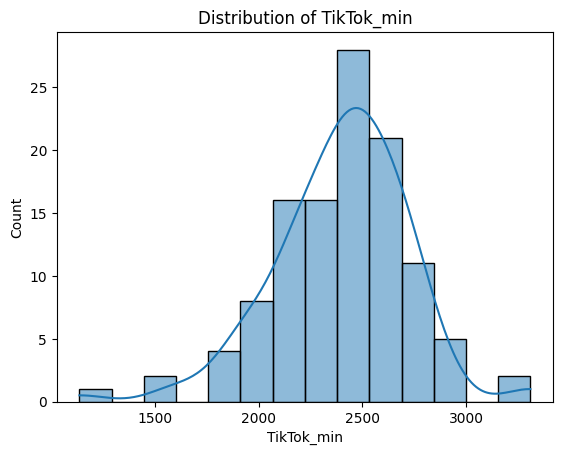

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df[social_cols[0]], kde=True)
plt.title(f"Distribution of {social_cols[0]}")
plt.show()

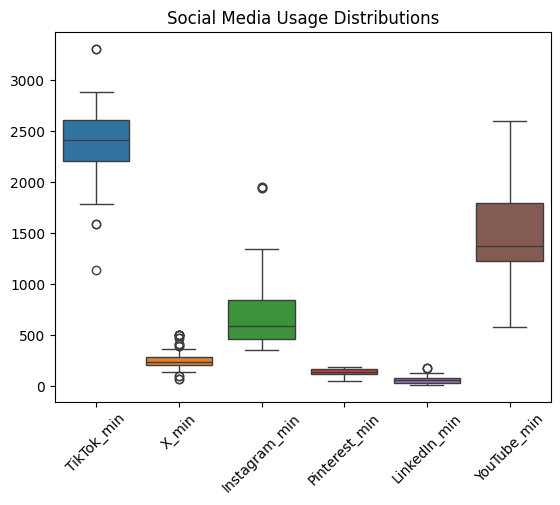

In [15]:
sns.boxplot(data=df[social_cols])
plt.xticks(rotation=45)
plt.title("Social Media Usage Distributions")
plt.show()

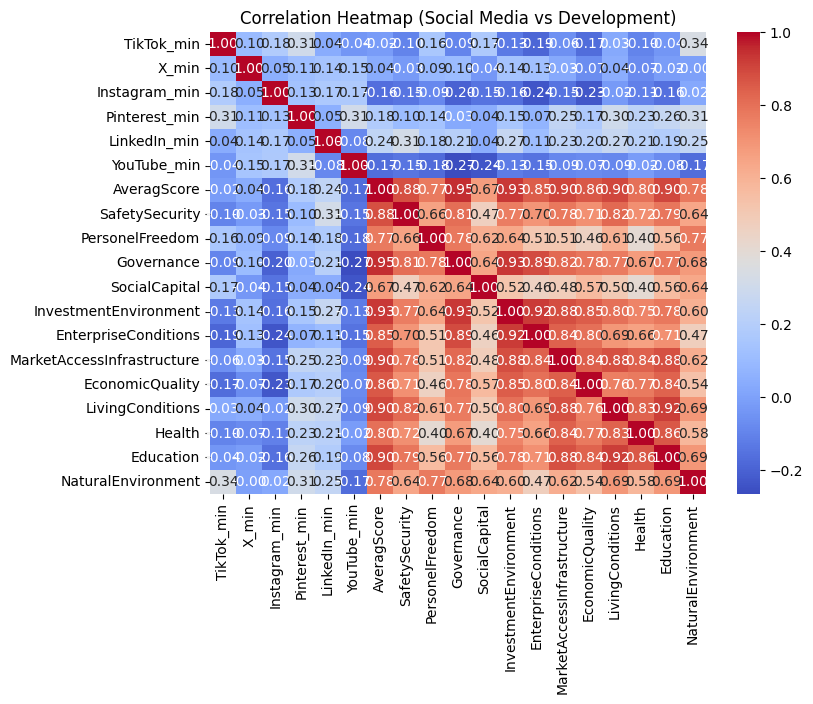

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[social_cols + list(development_cols)].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap (Social Media vs Development)")
plt.show()

In [ ]:
# EDA reveals moderate correlations between certain social media platforms and
# development indicators, motivating formal hypothesis testing.

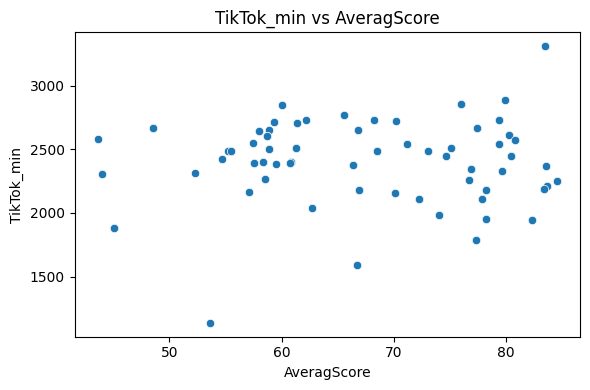

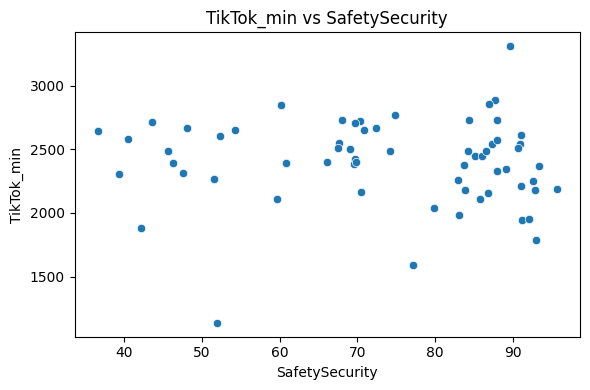

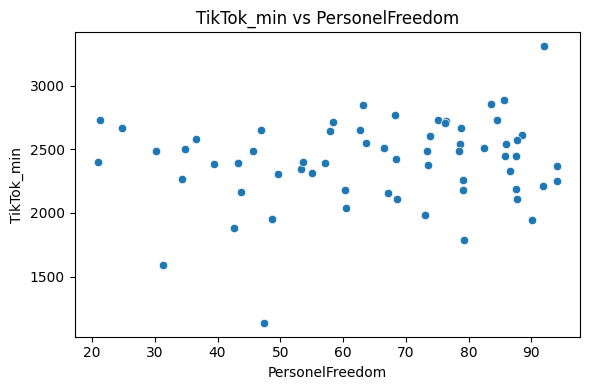

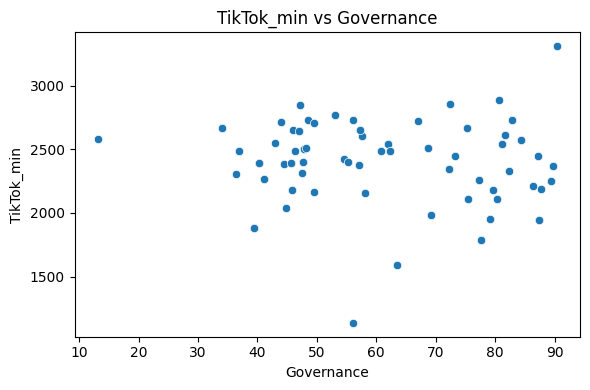

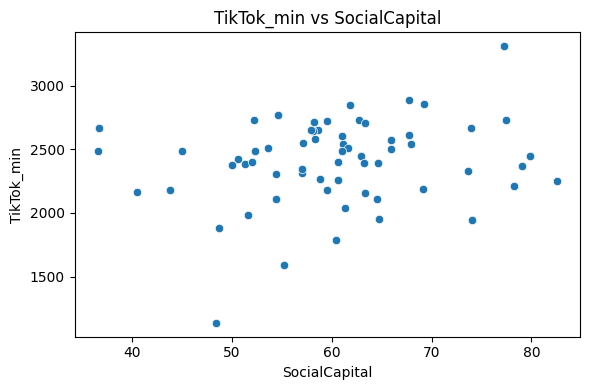

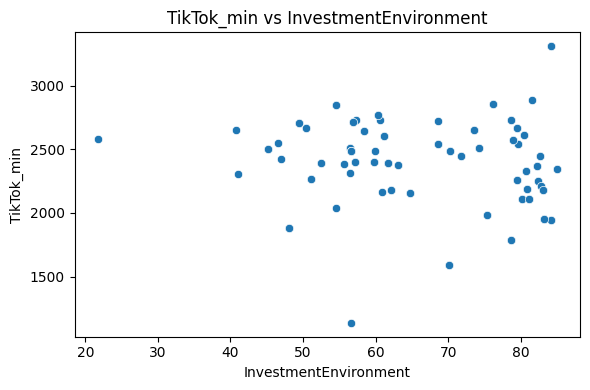

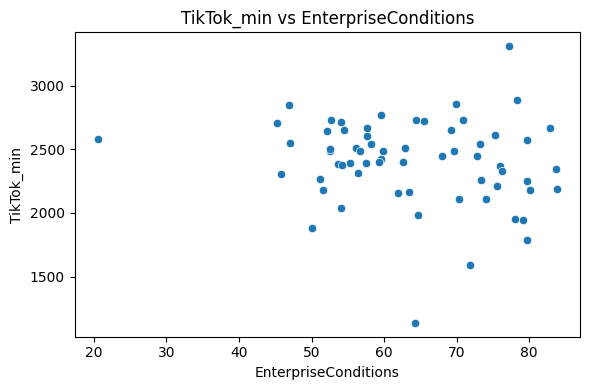

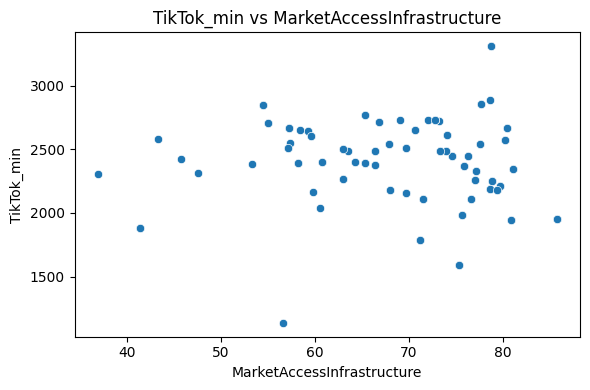

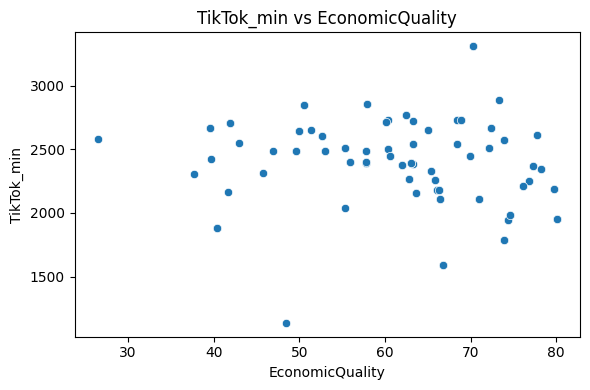

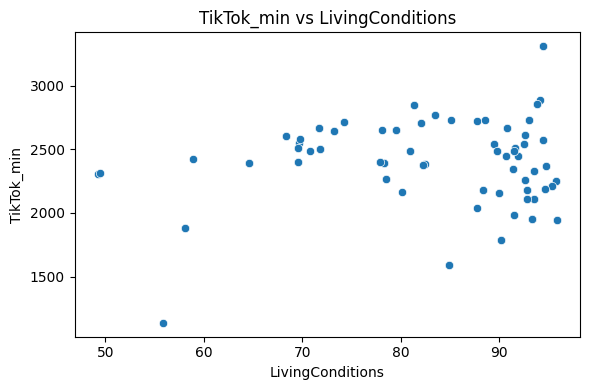

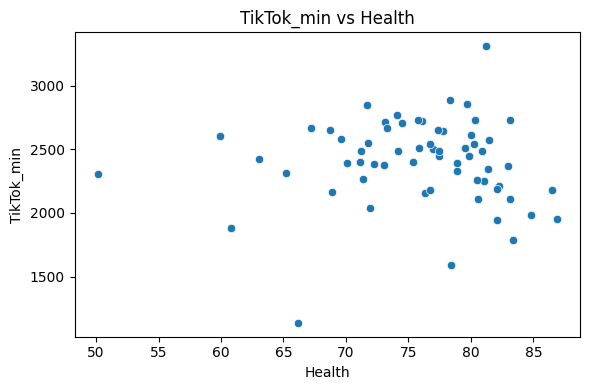

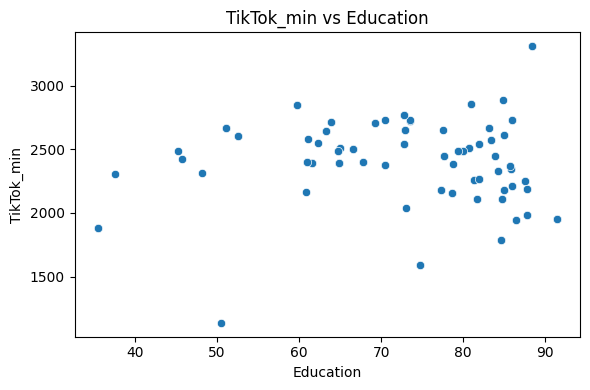

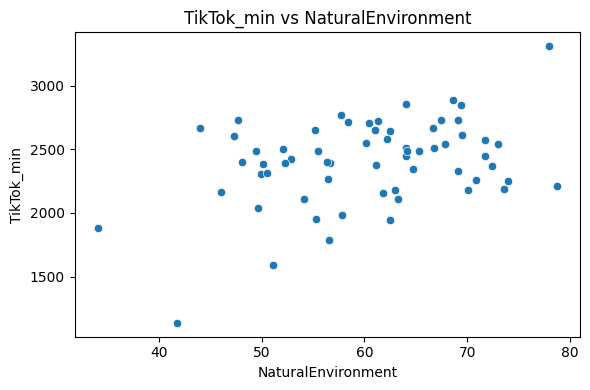

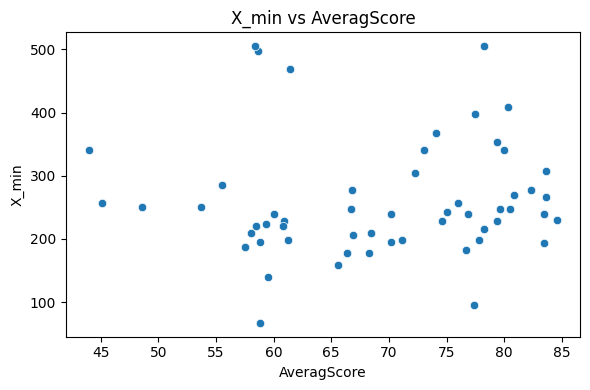

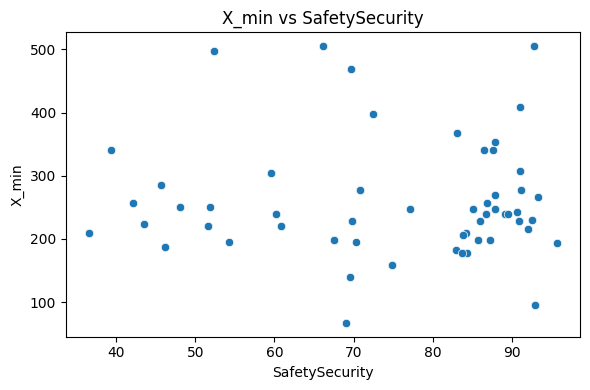

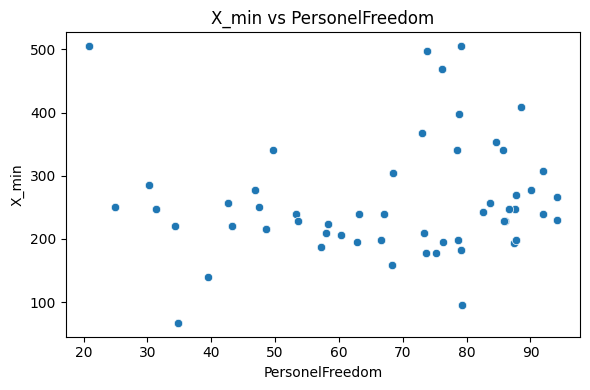

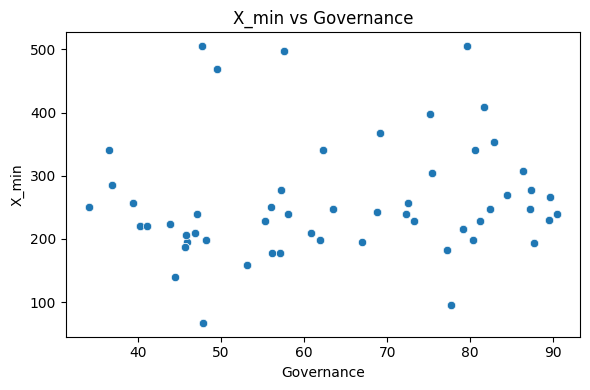

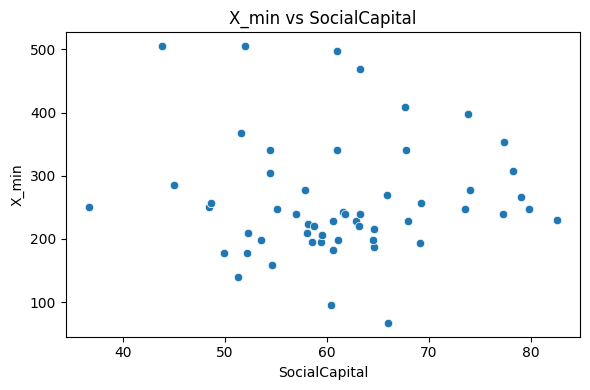

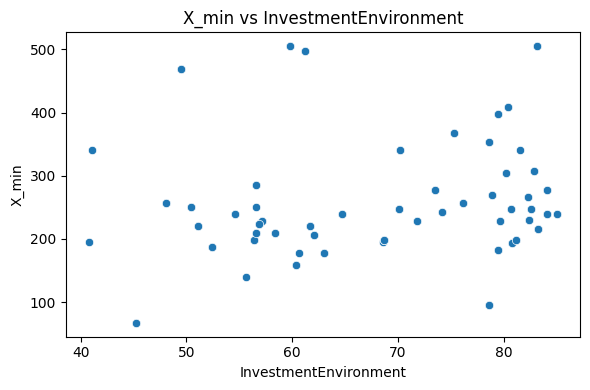

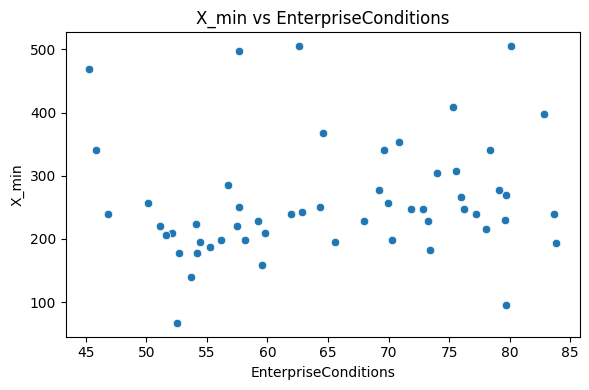

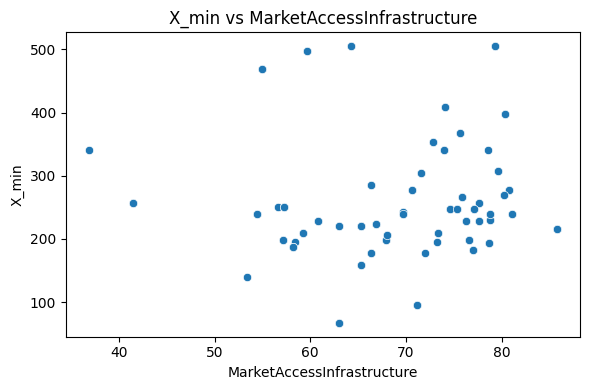

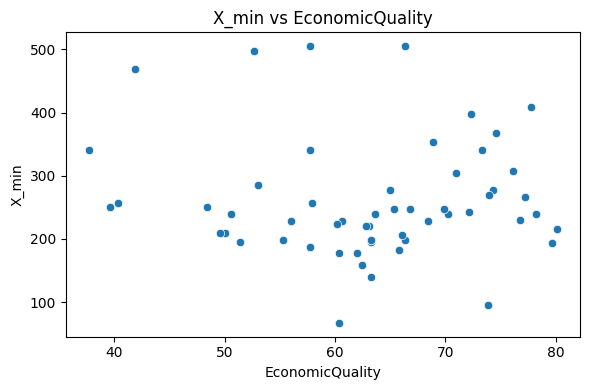

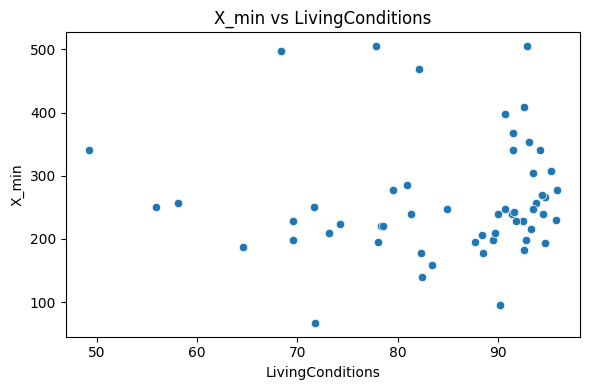

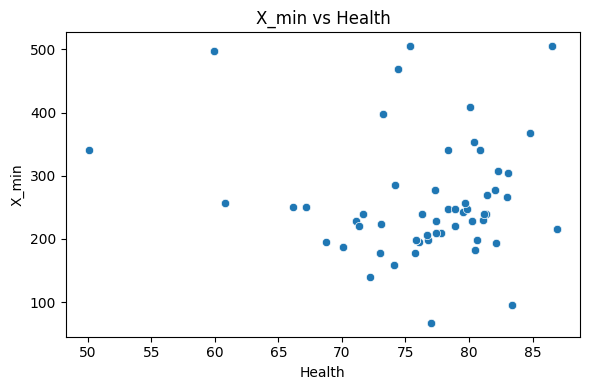

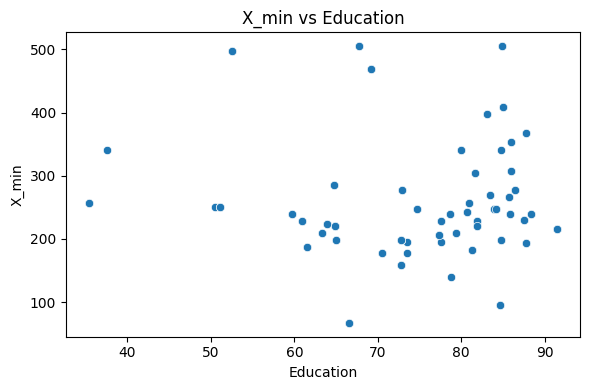

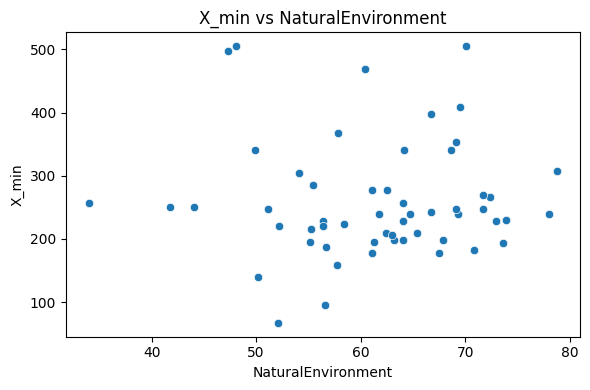

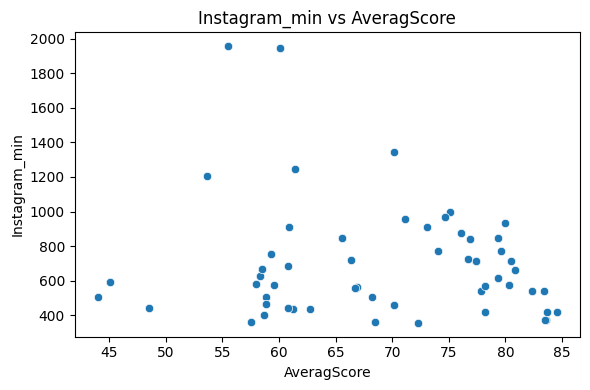

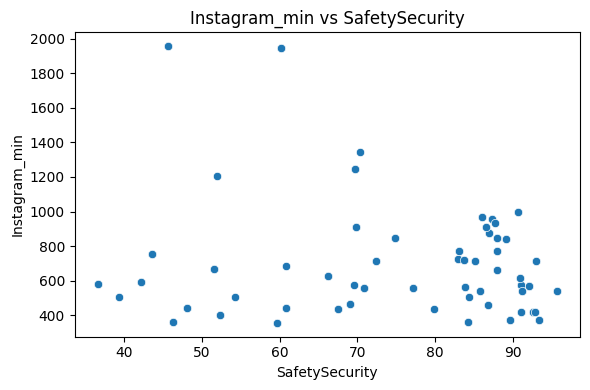

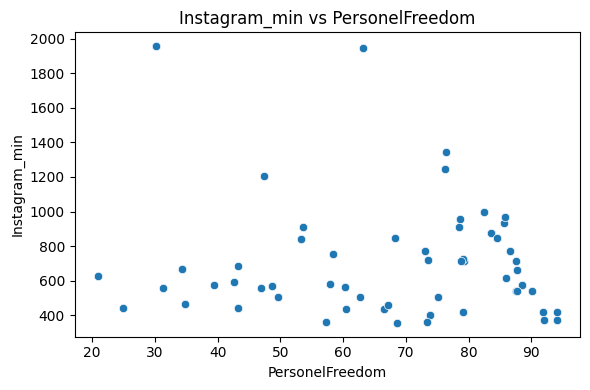

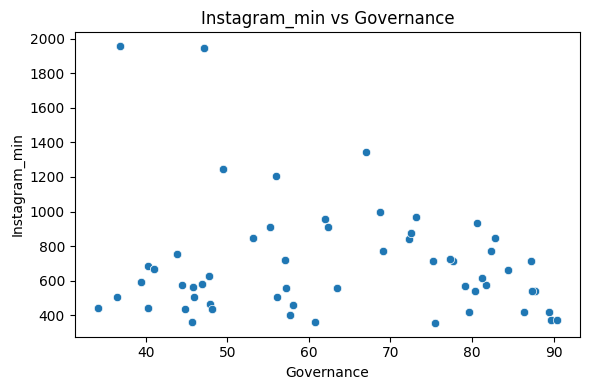

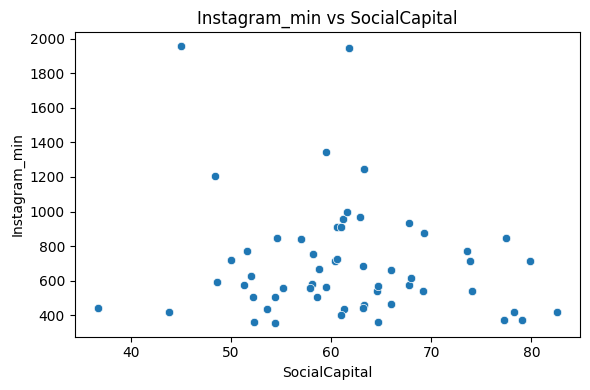

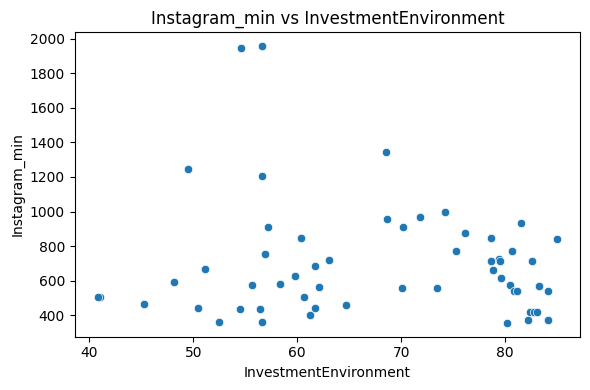

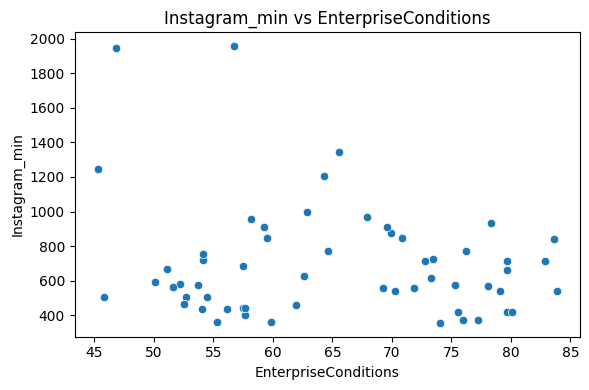

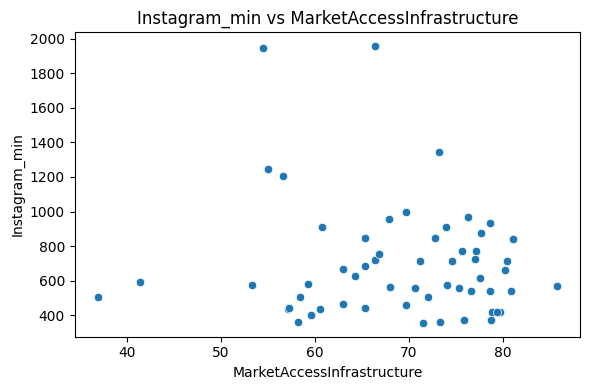

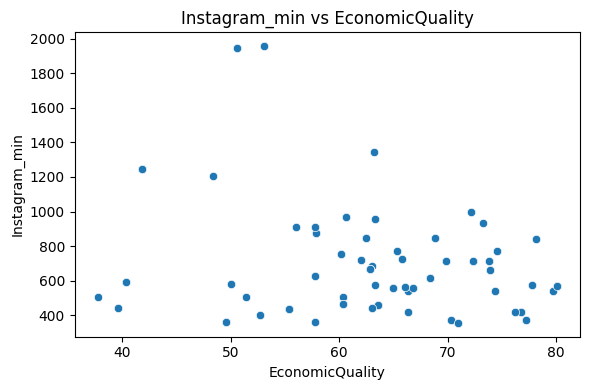

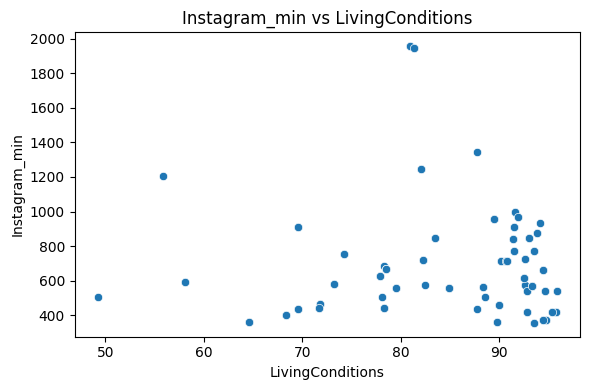

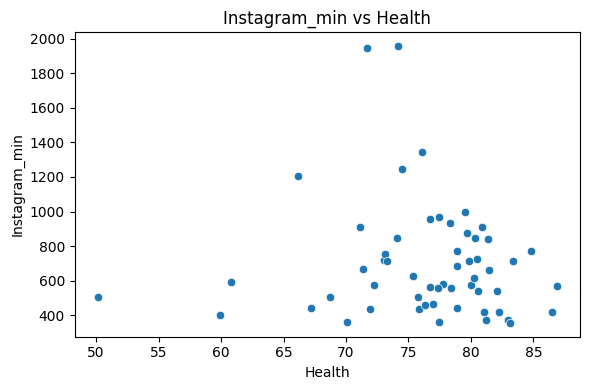

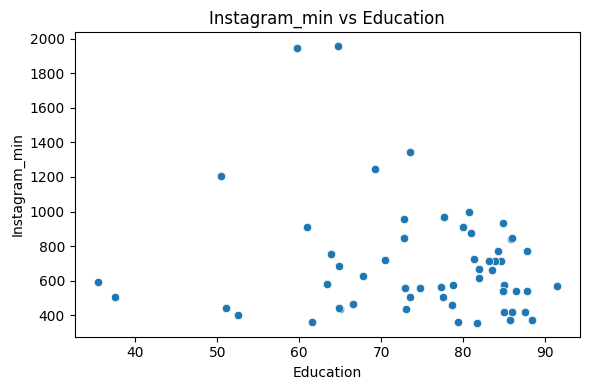

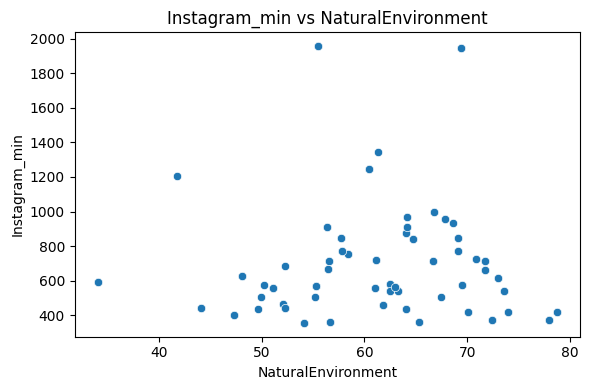

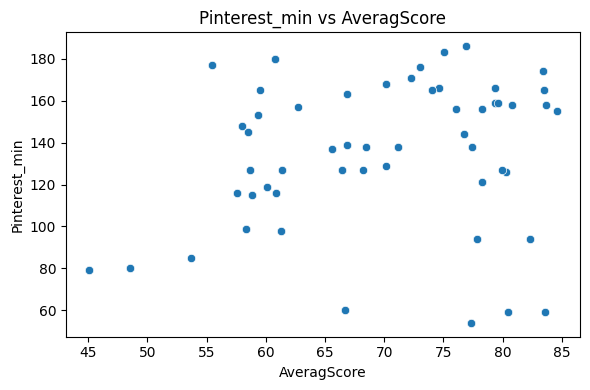

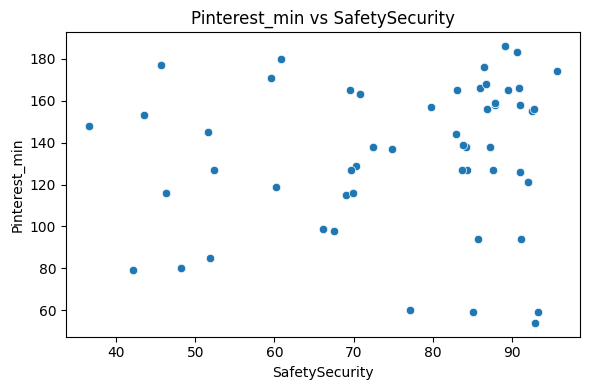

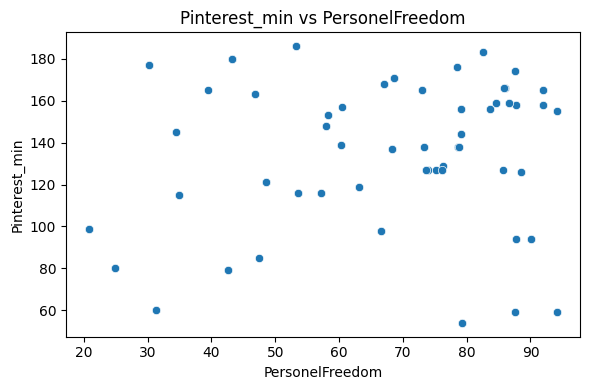

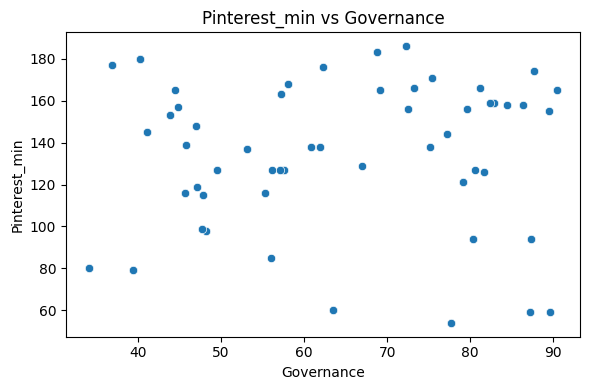

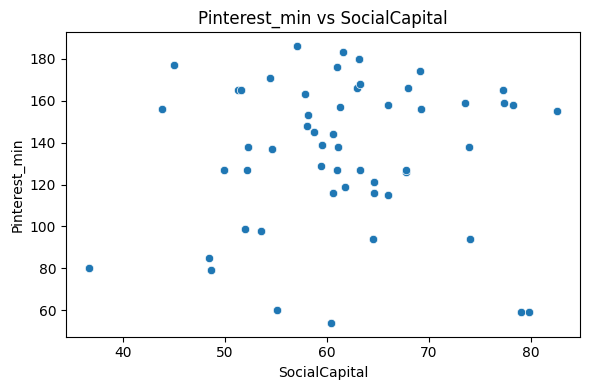

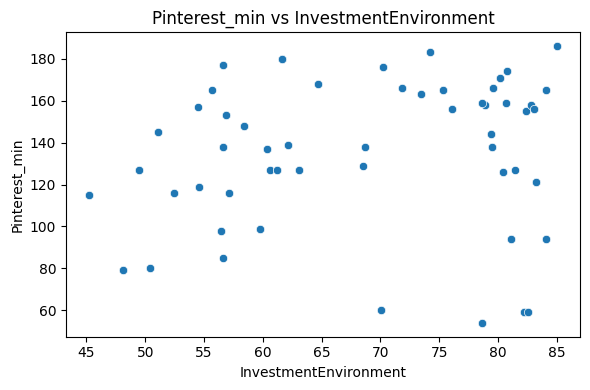

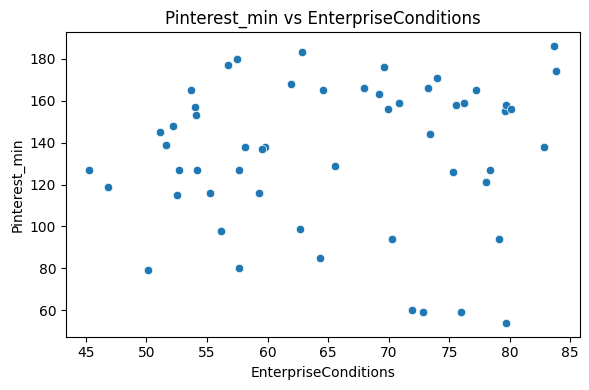

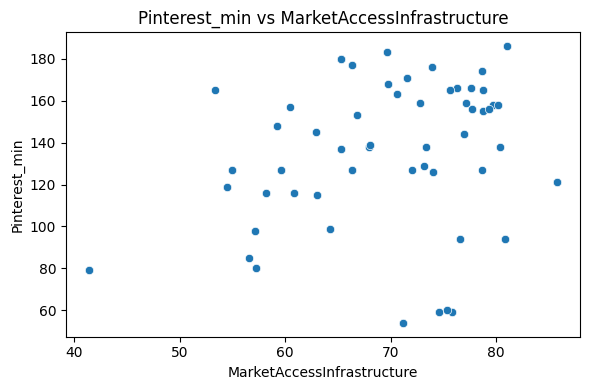

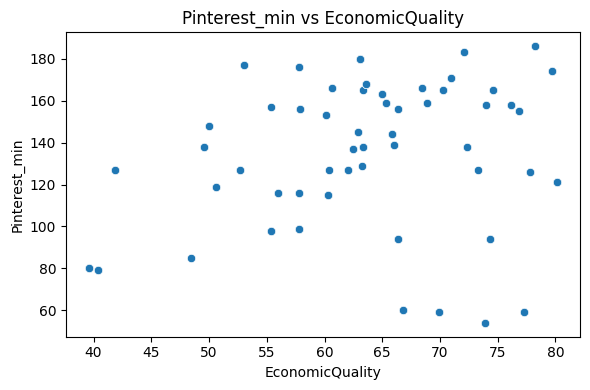

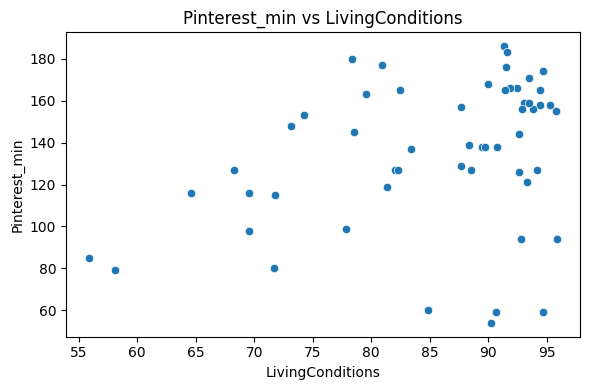

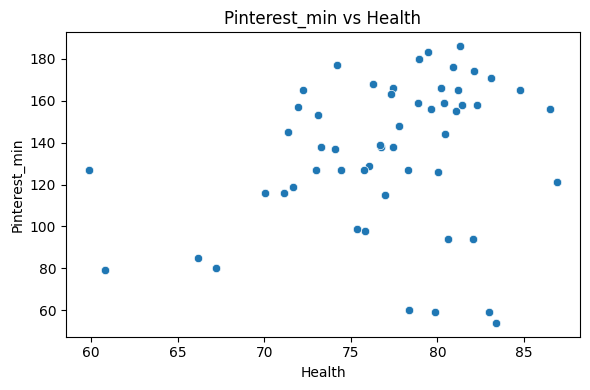

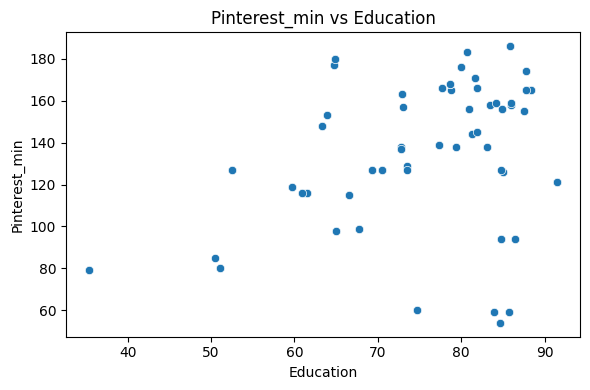

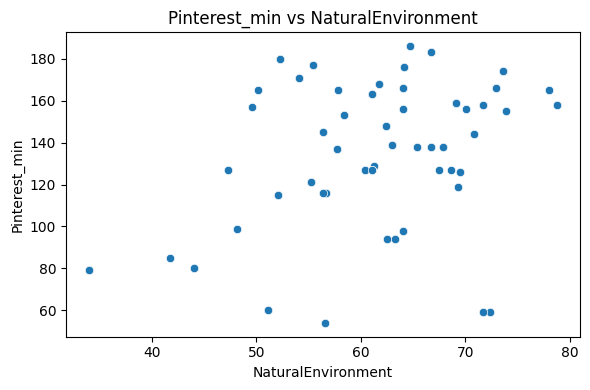

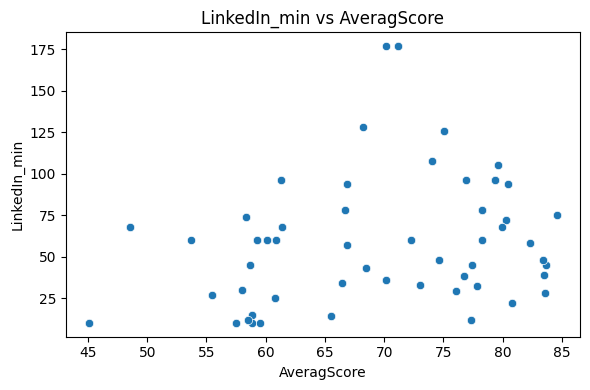

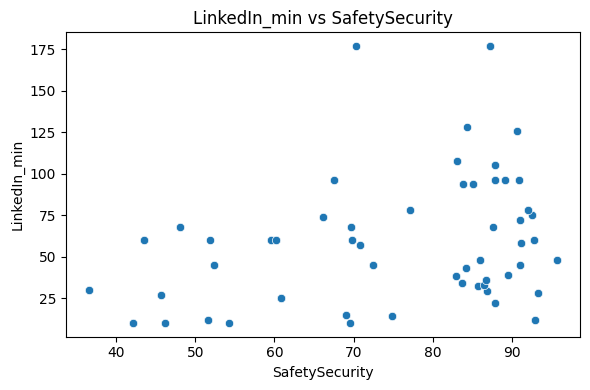

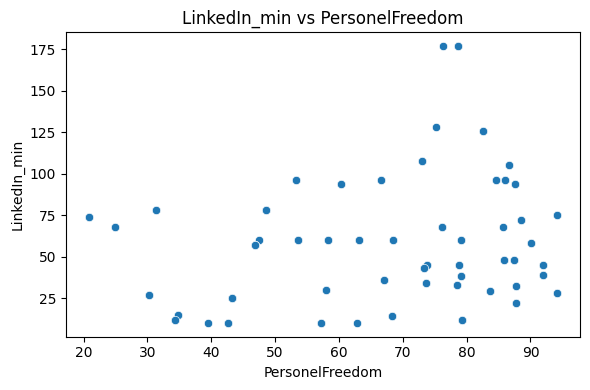

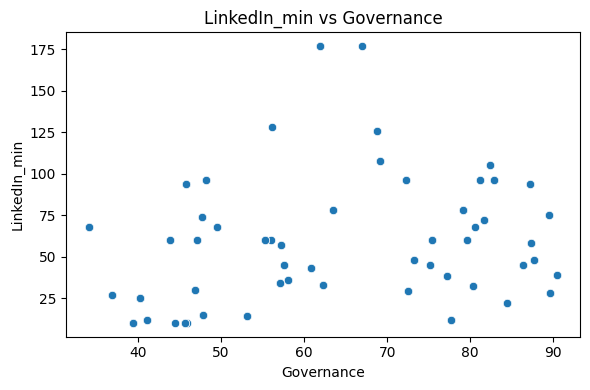

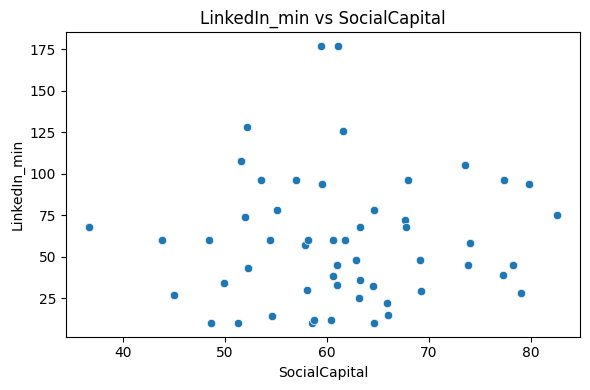

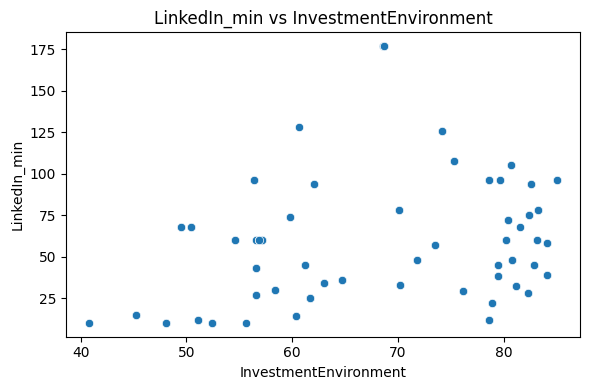

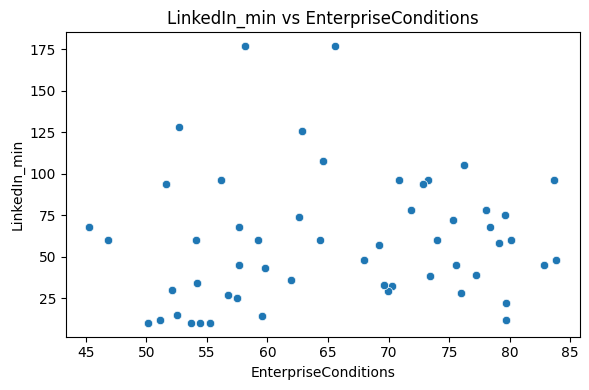

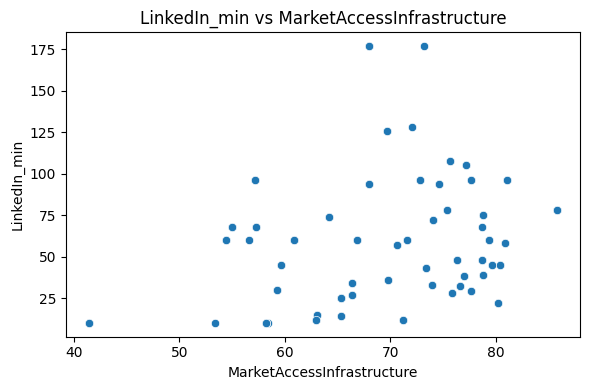

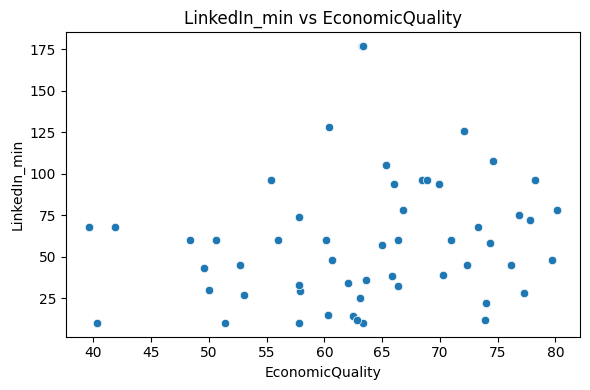

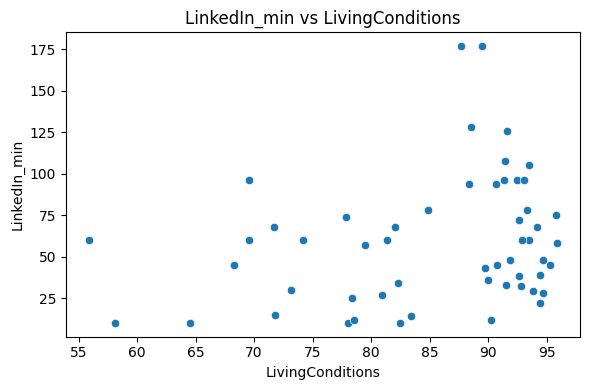

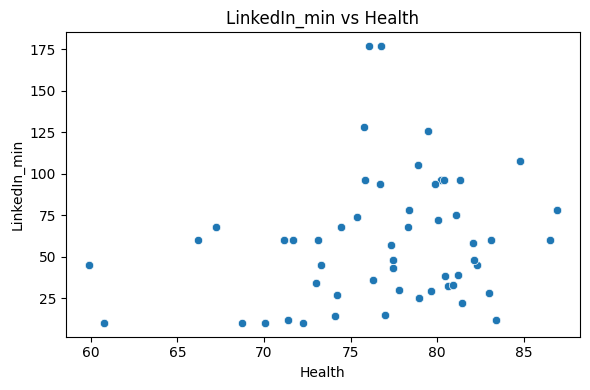

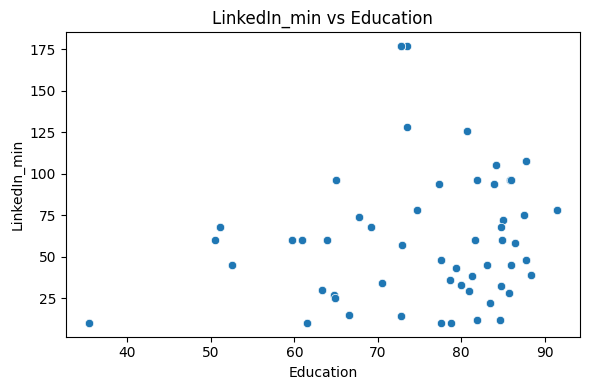

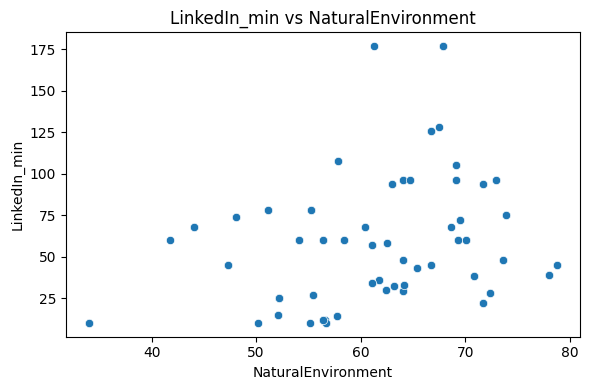

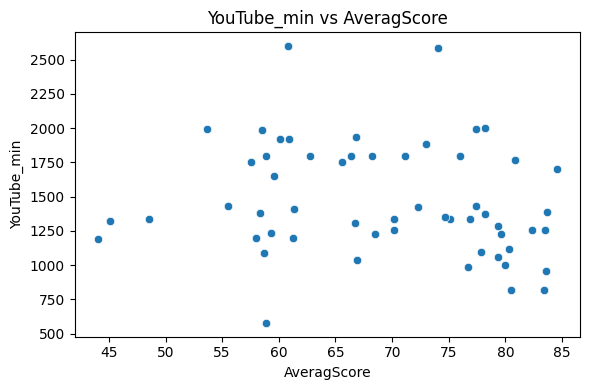

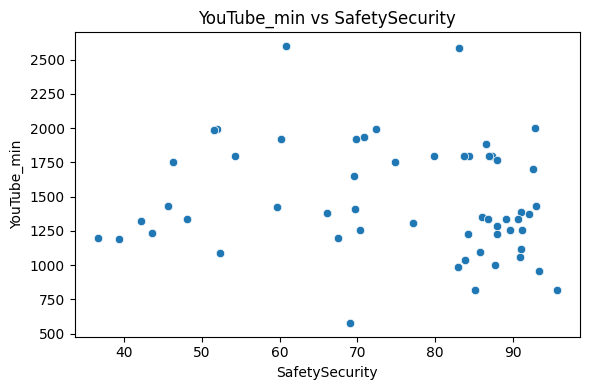

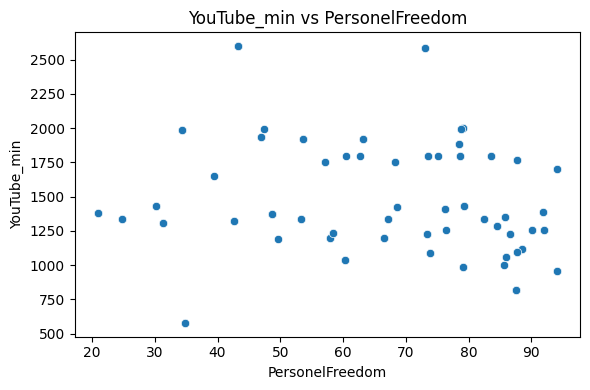

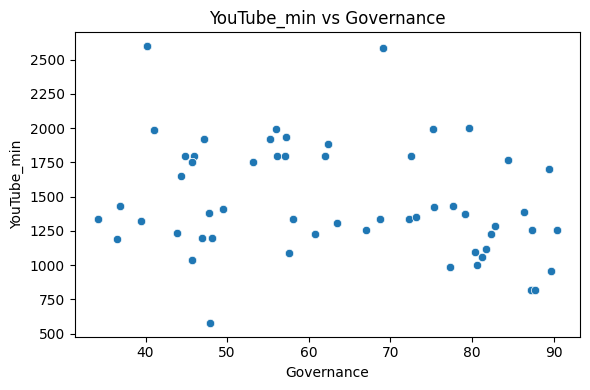

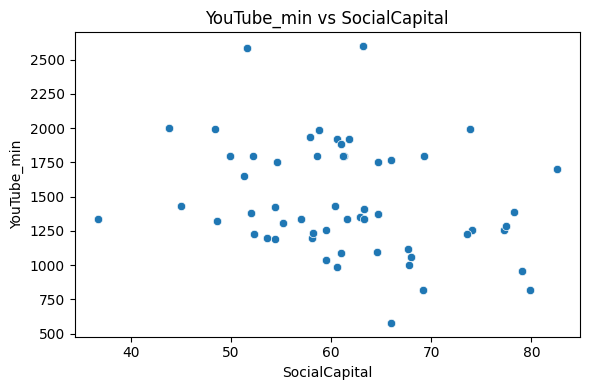

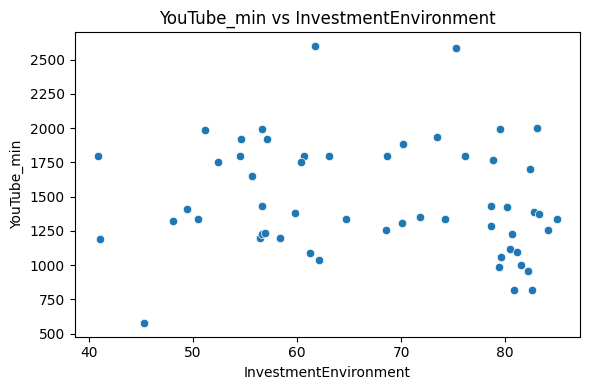

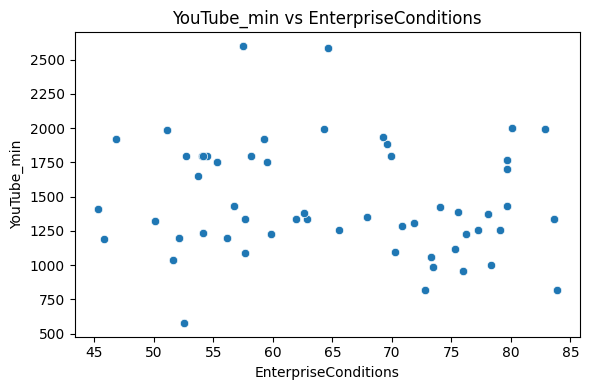

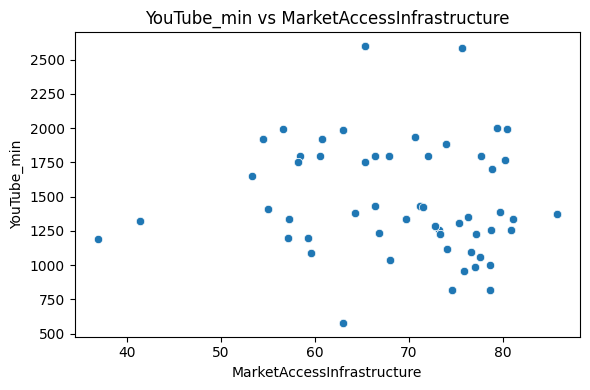

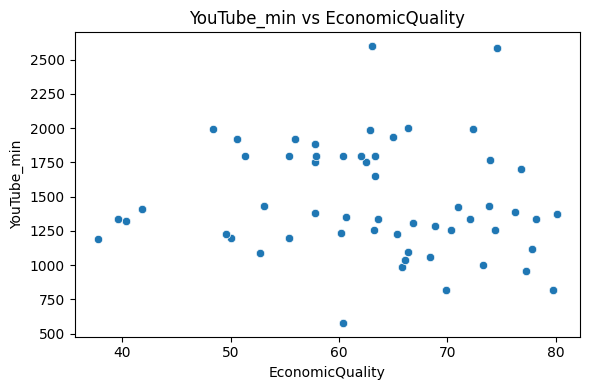

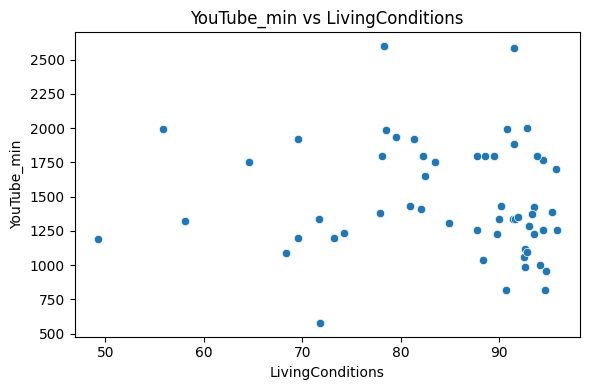

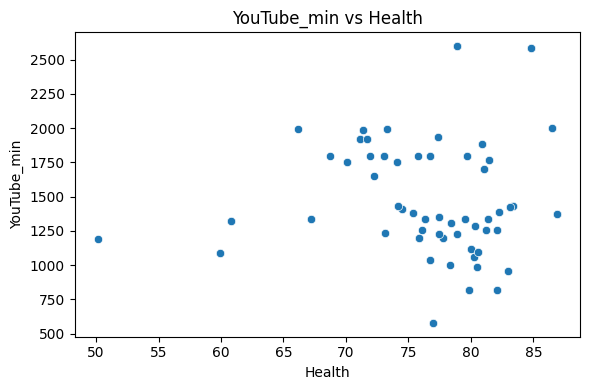

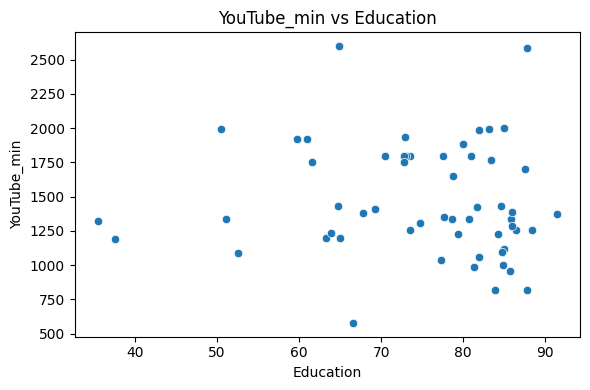

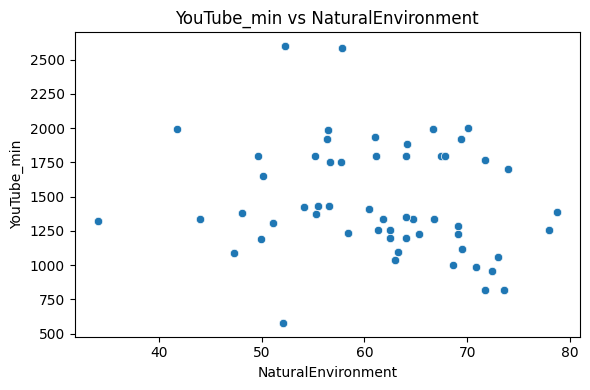

In [17]:
for soc in social_cols:
    for devcol in development_cols:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=df, x=devcol, y=soc)
        plt.title(f"{soc} vs {devcol}")
        plt.xlabel(devcol)
        plt.ylabel(soc)
        plt.tight_layout()
        plt.show()


## 6. Hypothesis Testing

In [ ]:
# For p-values below 0.05, the null hypothesis is rejected, indicating a statistically
# significant linear relationship between the variables.

In [23]:
from scipy.stats import pearsonr

results = []

for soc in social_cols:
    for devcol in development_cols:
        clean = df[[soc, devcol]].dropna()
        if len(clean) > 5:
            r, p = pearsonr(clean[soc], clean[devcol])
            results.append([soc, devcol, r, p])

results_df = pd.DataFrame(
    results,
    columns=["Social Variable", "Development Indicator", "Pearson r", "p-value"]
)

results_df[results_df["p-value"] < 0.05]


,Social Variable,Development Indicator,Pearson r,p-value
6,TikTok_min,EnterpriseConditions,-0.187762,0.046426
12,TikTok_min,NaturalEnvironment,0.342322,0.000206
29,Instagram_min,Governance,-0.202655,0.037216
32,Instagram_min,EnterpriseConditions,-0.237004,0.014440
34,Instagram_min,EconomicQuality,-0.233396,0.016048
46,Pinterest_min,MarketAccessInfrastructure,0.247558,0.011288
48,Pinterest_min,LivingConditions,0.299391,0.002019
49,Pinterest_min,Health,0.226880,0.020555
50,Pinterest_min,Education,0.260582,0.007548
51,Pinterest_min,NaturalEnvironment,0.307564,0.001493


In [22]:
from scipy.stats import spearmanr

spearman_results = []
for soc in social_cols:
    for devcol in development_cols:
        clean = df[[soc, devcol]].dropna()
        if len(clean) > 5:
            r_s, p_s = spearmanr(clean[soc], clean[devcol])
            spearman_results.append([soc, devcol, r_s, p_s])

spearman_df = pd.DataFrame(spearman_results, columns=["Social","Dev","rho","p"])
spearman_df[spearman_df["p"] < 0.05]


,Social,Dev,rho,p
1,TikTok_min,SafetySecurity,-0.213123,0.023424
5,TikTok_min,InvestmentEnvironment,-0.232681,0.013136
6,TikTok_min,EnterpriseConditions,-0.231986,0.013419
7,TikTok_min,MarketAccessInfrastructure,-0.184869,0.049964
8,TikTok_min,EconomicQuality,-0.283896,0.002309
10,TikTok_min,Health,-0.278334,0.002835
11,TikTok_min,Education,-0.241288,0.010036
12,TikTok_min,NaturalEnvironment,0.204738,0.029608
16,X_min,Governance,0.192822,0.048756
18,X_min,InvestmentEnvironment,0.210351,0.031254


Both Pearson and Spearman correlation analyses reveal statistically significant
relationships between social media usage and multiple development indicators.
While Pearson correlation identifies linear associations, Spearman correlation
confirms that these relationships remain significant when considering rank-based
and potentially non-linear dependencies. The consistency of direction and
significance across both methods indicates that the observed associations are
robust and not driven by distributional assumptions or outliers.


## 7. Machine Learning Application

A simple linear regression model was used to evaluate whether social media usage can predict development indicators. The obtained R² score indicates limited but non-negligible predictive power.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


target = development_cols[0]


ml_df = df[social_cols + [target]].dropna()

X = ml_df[social_cols]
y = ml_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
r2 = r2_score(y_test, preds)

r2


0.09743297068090973

The machine learning model achieved an R² score of approximately 0.097, indicating
that social media usage variables explain a limited proportion of the variance in
the selected development indicator. This suggests that although social media usage
is statistically associated with development outcomes, it has weak standalone
predictive power and should be interpreted as a complementary rather than
deterministic factor.


## 8. Conclusion

This study investigated the relationship between social media usage patterns and
country-level development indicators using correlation-based hypothesis testing
and machine learning methods. The results indicate that social media usage is not
uniformly associated with development; instead, platform-specific patterns
emerge across different development dimensions.

Correlation analyses using both Pearson and Spearman methods reveal that platforms
such as LinkedIn and Pinterest tend to show positive associations with
institutional, economic, and quality-of-life indicators, whereas TikTok and
YouTube are more often negatively associated with governance and economic
conditions. The consistency of results across both correlation methods suggests
that these relationships are robust and not driven by distributional assumptions.

The machine learning analysis further demonstrates that social media usage alone
has limited predictive power for development outcomes, reinforcing the idea that
development is influenced by multiple structural factors. Overall, the findings
suggest that social media usage reflects underlying development contexts rather
than acting as a direct driver of development, emphasizing the importance of
platform-specific and contextual interpretation in cross-country analyses.
